In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

data = pd.read_csv('../lol/high_diamond_ranked_10min.csv', sep=',', encoding='CP949')
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [80]:
del data['gameId']

In [81]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data, test_size=0.3, random_state=0)
df_train.shape, df_test.shape

((6915, 39), (2964, 39))

In [82]:
train_y = df_train['blueWins']
del df_train['blueWins']
test_y = df_test['blueWins']
del df_test['blueWins']

In [83]:
rf = RandomForestClassifier(n_estimators = 100, oob_score = True, random_state = 0)
rf.fit(df_train,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

In [84]:
predicted = rf.predict(df_test)

print("정확도 : {0:.3f}".format(accuracy_score(test_y,predicted)))

정확도 : 0.712


In [85]:
rt_param_grid = {
    'n_estimators' : [100,200],
    'max_depth' : [6,8,10,12],
    'min_samples_leaf' : [3,5,7,10],
    'min_samples_split' : [2,3,5,10]
}

In [86]:
rf_grid = GridSearchCV(rf, param_grid = rt_param_grid, scoring = "accuracy", n_jobs = -1, verbose = 1)
rf_grid.fit(df_train,train_y)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:  1.7min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200], 'max_depth': [6, 8, 10, 12], 'min_samples_leaf': [3, 5, 7, 10], 'min_samples_split': [2, 3, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [87]:
print("정확도 : {0:.4f}".format(rf_grid.best_score_))
print("파라미터 : ",rf_grid.best_params_)

정확도 : 0.7364
파라미터 :  {'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}


In [88]:
results = pd.DataFrame(rf_grid.cv_results_)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, *

In [89]:
feature_importances = rf.feature_importances_

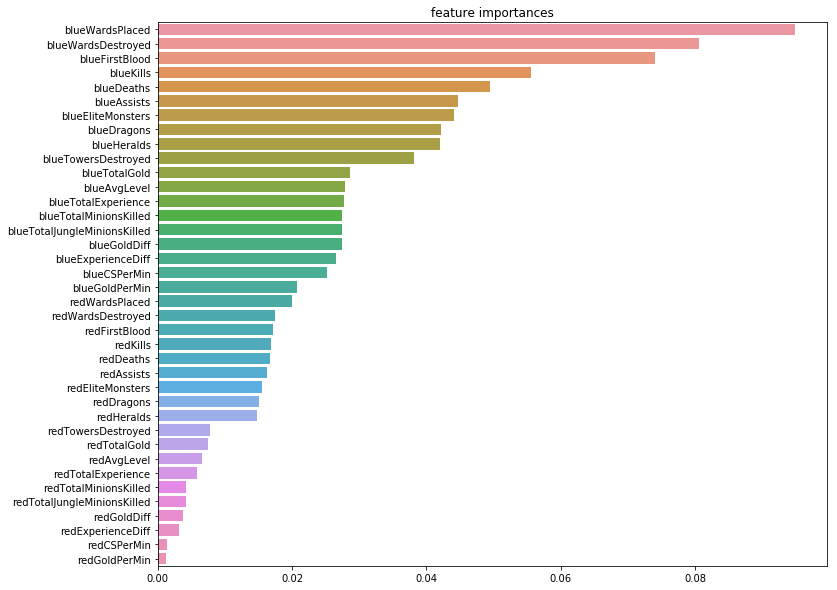

In [90]:
ft_importances = pd.Series(feature_importances, index = df_train.columns)
ft_importances = ft_importances.sort_values(ascending = False)

plt.figure(figsize = (12,10))
plt.title("feature importances")
sns.barplot(x=ft_importances, y= df_train.columns)
plt.show()